# Perkenalan Diri 
- Nama      : Andreean Dharma Arisandi
- Batch     : FTDS-011
- Dataset   : Sentiment Tweet bitcoin
- Objective : Prediksi Sentiment analisis Bitcoin

# Import Library

In [1]:
import nltk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from tensorflow.keras.models import Model, Sequential
import tensorflow as tf
from tensorflow.keras.layers import TextVectorization
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import sys
from gensim.corpora import WikiCorpus
import multiprocessing
import multiprocessing
from gensim.models import Word2Vec
from gensim.models.word2vec import LineSentence
from tensorflow import keras
nltk.download('stopwords')
nltk.download('punkt')
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
import re
from nltk.stem import LancasterStemmer
from tensorflow.keras.layers import TextVectorization, Embedding
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from tensorflow.keras.layers import Dense, GlobalAveragePooling1D, Input
from tensorflow.keras.models import Model, Sequential
from keras.layers import Dropout
from tensorflow.keras.layers import Dense, GlobalAveragePooling1D, Input, LSTM, GRU
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix
from keras.layers.normalization.batch_normalization import BatchNormalization

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


# Data Loading

In [2]:
data = pd.read_csv("bitcointweets.csv", header=None)
data = data[[1,7]]
data.columns = ['tweet','sentiment']
data.head()

,tweet,sentiment
0,"RT @ALXTOKEN: Paul Krugman, Nobel Luddite. I h...",['neutral']
1,@lopp @_Kevin_Pham @psycho_sage @naval But @Pr...,['neutral']
2,RT @tippereconomy: Another use case for #block...,['positive']
3,free coins https://t.co/DiuoePJdap,['positive']
4,RT @payvxofficial: WE are happy to announce th...,['positive']


Load data dan hanya menggunakan 2 kolom yaitu tweet dan label sentiment

In [3]:
print(data.tweet[0])

RT @ALXTOKEN: Paul Krugman, Nobel Luddite. I had to tweak the nose of this Bitcoin enemy. He says such foolish things. Here's the link: htt…


Tweet pada data pertama

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50859 entries, 0 to 50858
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tweet      50859 non-null  object
 1   sentiment  50859 non-null  object
dtypes: object(2)
memory usage: 794.8+ KB


Berdasarkan info diatas terdaoat 50859 baris dan 2 kolom yang saya gunakan tweet dan label sentiment

In [5]:
data.isnull().sum()

tweet        0
sentiment    0
dtype: int64

Tidak terdapat missing value pada dataset

# Exploratory Data Analysis

In [6]:
plt.style.use('fivethirtyeight')

Style untuk EDA

In [7]:
data['sentiment'].value_counts()

['positive']    22937
['neutral']     21939
['negative']     5983
Name: sentiment, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


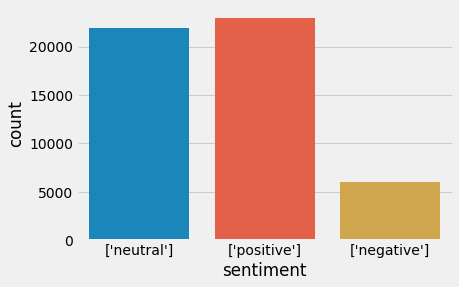

In [8]:
sns.countplot(data['sentiment'])

Dari dataset diatas positive berjumlah 22937, neutral 21939 dan negative 5983

In [9]:
negative = data[data['sentiment']=="['negative']"]
negative

,tweet,sentiment
29,RT @BUY_and_SELL5: Cryptocurrency Market Remai...,['negative']
33,Should we be crying out for standardisation an...,['negative']
38,Bitcoin Loses $9k Support After Binance Confus...,['negative']
41,1: Bitcoin average price is $8712.32 (-0.39% 1...,['negative']
57,RT @UPROXX: Twitter CEO Jack Dorsey predicts t...,['negative']
...,...,...
50801,RT @PumaPay: Why Did Credit Cards Fail to Adop...,['negative']
50814,Bitcoin Will Be World's 'Single Currency' Says...,['negative']
50818,RT @CloudMiningX: Use the code: HF18BDAY30 at ...,['negative']
50837,Twitter CEO Says Bitcoin Will Be World’s ‘Sing...,['negative']


Tweet yang berlabel negtive

In [10]:
negative = data[data['sentiment']=="['neutral']"]
negative

,tweet,sentiment
0,"RT @ALXTOKEN: Paul Krugman, Nobel Luddite. I h...",['neutral']
1,@lopp @_Kevin_Pham @psycho_sage @naval But @Pr...,['neutral']
7,One click to start mining cryptocurrencies tog...,['neutral']
11,RT @livemarketcap: ICE Agency Charges Payza an...,['neutral']
12,RT @Vaultoro: We have all seen the HTTP protoc...,['neutral']
...,...,...
50846,Bitcoin: Mastering Bitcoin: Discover How I (An...,['neutral']
50848,"#Zhao #Dong #Recounts How He Lost 9,000 #BTC h...",['neutral']
50851,Bitcoin Price Technical Analysis for 03/23/201...,['neutral']
50853,"RT @PhotoCoin_io: 2,000,000 PHT TOKEN #airdrop...",['neutral']


Tweet yang berlabel netral

In [11]:
negative = data[data['sentiment']=="['positive']"]
negative

,tweet,sentiment
2,RT @tippereconomy: Another use case for #block...,['positive']
3,free coins https://t.co/DiuoePJdap,['positive']
4,RT @payvxofficial: WE are happy to announce th...,['positive']
5,Copy successful traders automatically with Bit...,['positive']
6,RT @bethereumteam: We're revealing our surpris...,['positive']
...,...,...
50852,RT @coindesk: Coinbase Is In Talks to Buy One ...,['positive']
50854,RT @fixy_app: Fixy Network brings popular cryp...,['positive']
50855,RT @bethereumteam: After a successful launch o...,['positive']
50857,I added a video to a @YouTube playlist https:/...,['positive']


Tweet yang berlabel positive

In [12]:
# Panjang kata
data['text_length'] = data['tweet'].apply(len)
data.head()

,tweet,sentiment,text_length
0,"RT @ALXTOKEN: Paul Krugman, Nobel Luddite. I h...",['neutral'],140
1,@lopp @_Kevin_Pham @psycho_sage @naval But @Pr...,['neutral'],137
2,RT @tippereconomy: Another use case for #block...,['positive'],140
3,free coins https://t.co/DiuoePJdap,['positive'],34
4,RT @payvxofficial: WE are happy to announce th...,['positive'],146


Membuat Kolom baru text_length yaitu jumlah karakter pada tweet, twitter memiliki maksimal 280 karakter

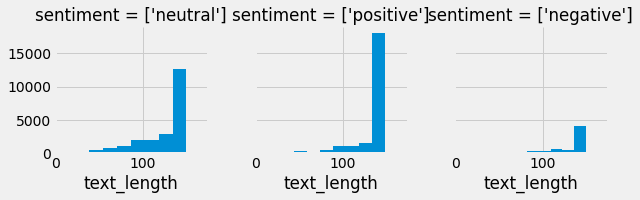

In [13]:
tl = sns.FacetGrid(data,col='sentiment')
tl.map(plt.hist,'text_length')

Berdasarkan grafik diatas banyak tweet yang berisi pada text yang berjumlah 150 karakter, ini bisa dikatakan karena untuk membahas bitcoin cukup banyak menggunakan karakter.

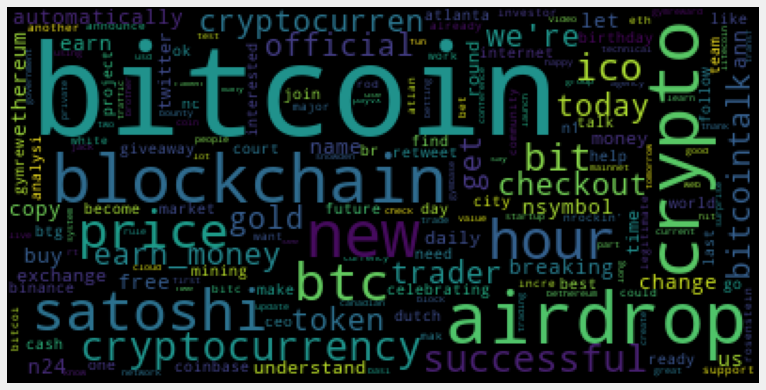

In [14]:
def clean_text(s):
    s = re.sub(r'http\S+', '', s)
    s = re.sub('(RT|via)((?:\\b\\W*@\\w+)+)', ' ', s)
    s = re.sub(r'@\S+', '', s)
    s = re.sub('&amp', ' ', s)
    return s
data['clean_tweet'] = data['tweet'].apply(clean_text)

text = data['clean_tweet'].to_string().lower()    
wordcloud = WordCloud(
    collocations=False,
    relative_scaling=0.5,
    stopwords=set(stopwords.words('english'))).generate(text)

plt.figure(figsize=(12,12))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

berdasarkan wordcloud kata yang paling sering muncul adalah bitcoinm crypto, satoshi dan blockchain

# Preprocessing

In [15]:
tf.random.set_seed(27)
np.random.seed(27)

In [16]:
data.head()

,tweet,sentiment,text_length,clean_tweet
0,"RT @ALXTOKEN: Paul Krugman, Nobel Luddite. I h...",['neutral'],140,": Paul Krugman, Nobel Luddite. I had to tweak..."
1,@lopp @_Kevin_Pham @psycho_sage @naval But @Pr...,['neutral'],137,But (dum b a ss) said you know nothing ab...
2,RT @tippereconomy: Another use case for #block...,['positive'],140,: Another use case for #blockchain and #Tippe...
3,free coins https://t.co/DiuoePJdap,['positive'],34,free coins
4,RT @payvxofficial: WE are happy to announce th...,['positive'],146,: WE are happy to announce that PayVX Presale...


Label sentiment telah berubah menjadi 0,1 dan 2

In [17]:
print(data.tweet[0])

RT @ALXTOKEN: Paul Krugman, Nobel Luddite. I had to tweak the nose of this Bitcoin enemy. He says such foolish things. Here's the link: htt…


Tweet pertama pada dataset

## Case Folding

- Ubah teks ke lowercase
- Menghilangkan tanda baca
- Menghilangkan karakter yang tidak diperlukan
- Menghilangkan stopwords
- Stemming

In [18]:
#Tanda @ pada username hilang, sehingga nanti kita tidak bisa menghapus username dengan mudah karena tidak diperlukan

def tweet_proses(tweet):
  # Mengubah teks ke lowercase
  tweet_lower = tweet.lower()
  # text proses pucn
  tweet_punc = re.sub("@[A-Za-z0-9_]+"," ", tweet_lower) #Menghilangkan mention
  tweet_punc = re.sub("#[A-Za-z0-9_]+"," ", tweet_punc) #Menghilangkan hashtag
  tweet_punc = re.sub(r"\\n"," ",tweet_punc) #Menghilangkan \n
  tweet_punc = tweet_punc.strip()
  tweet_punc = re.sub(r"http\S+", " ", tweet_punc) #Menghilangkan link
  tweet_punc = re.sub(r"www.\S+", " ", tweet_punc) #Menghilangkan link
  tweet_punc = re.sub("[^A-Za-z\s']"," ", tweet_punc) #Menghilangkan yang bukan huruf
  tweet_punc = re.sub("rt"," ",tweet_punc) #Menghilangkan RT
  tweet_punc

  # remove stopword
  stpwds_eng = list(set(stopwords.words('english')))
  tokens = word_tokenize(tweet_punc)
  tweet_stopword = [word for word in tokens if word not in stpwds_eng]

  # text steming
  lstemmer = LancasterStemmer()
  tweet_stemmed = [lstemmer.stem(word) for word in tweet_stopword]
  tweet   = lstemmer.stem(tweet_punc)
  return ' '.join([lstemmer.stem(word) for word in tweet_stemmed])

Melakukan Text Processing Case Folding yaitu :
  - Menggunakan lower untuk mengubah semua tweet menjadi huruf kecil
  - Menggunakan RegEx untuk menghilangkan tanda baca yang tidak ada nilai sentiment seperti mention(@), hastag (#), menghilangkan link baik http atau pun www, menghilangkan yang bukan huruf, menghilangkan Retweet (RT) pada tweet
  - Menggunakan Stopword english untuk menghapus kata-kata yang tidak memiliki makna
  - Menggunakan Text Steming LancasterStemmer bahasa inggris untuk menghilangkan imbuhan–imbuhan yang ada dalam kata–kata sehingga didapatkan kata dasar

In [19]:
data['tweet'][0]

"RT @ALXTOKEN: Paul Krugman, Nobel Luddite. I had to tweak the nose of this Bitcoin enemy. He says such foolish things. Here's the link: htt…"

Data tweet awal yang masih belum dibersihkan kalimatnya

In [20]:
tweet_proses(data['tweet'][0])

"paul krugm nobel luddit tweak nos bitcoin enemy say fool thing 's link htt"

Tweet yang sudah dibersihkan menggunakan Lower, RegEx dan Steming, bisa dilihat kata diatas sudah menjadi kata dasar dari setiap kata awal

In [21]:
data['text_processed'] = data['tweet'].apply(lambda x: tweet_proses(x))
data

,tweet,sentiment,text_length,clean_tweet,text_processed
0,"RT @ALXTOKEN: Paul Krugman, Nobel Luddite. I h...",['neutral'],140,": Paul Krugman, Nobel Luddite. I had to tweak...",paul krugm nobel luddit tweak nos bitcoin enem...
1,@lopp @_Kevin_Pham @psycho_sage @naval But @Pr...,['neutral'],137,But (dum b a ss) said you know nothing ab...,dum b ss said know noth
2,RT @tippereconomy: Another use case for #block...,['positive'],140,: Another use case for #blockchain and #Tippe...,ano us cas un facebook chang every ico liv
3,free coins https://t.co/DiuoePJdap,['positive'],34,free coins,fre coin
4,RT @payvxofficial: WE are happy to announce th...,['positive'],146,: WE are happy to announce that PayVX Presale...,happy annount payvx pre pha liv sign gt gt cur...
...,...,...,...,...,...
50854,RT @fixy_app: Fixy Network brings popular cryp...,['positive'],140,: Fixy Network brings popular cryptocurrencie...,fixy network bring pop cryptoc retail pa ner b...
50855,RT @bethereumteam: After a successful launch o...,['positive'],140,: After a successful launch of our Bounty cam...,success launch bounty campaign 've man filt bo...
50856,"RT @GymRewards: Buy #GYMRewards Tokens, Bonus ...",['neutral'],140,": Buy #GYMRewards Tokens, Bonus Time is endin...",buy tok bon tim end
50857,I added a video to a @YouTube playlist https:/...,['positive'],121,I added a video to a playlist How To Bitcoin...,ad video playl bitcoin cloud min fre lifetim u...


Menambahkan kolom baru yaitu text_processedd hasil dari text processing, bisa dilihat perbedaanya text_processedd kalimatnya sudah bersih

In [22]:
data.sentiment.unique()

array(["['neutral']", "['positive']", "['negative']"], dtype=object)

In [23]:
data['label'] = data['sentiment'].replace({"['negative']" : 0, "['neutral']" : 1, "['positive']" : 2})
data

,tweet,sentiment,text_length,clean_tweet,text_processed,label
0,"RT @ALXTOKEN: Paul Krugman, Nobel Luddite. I h...",['neutral'],140,": Paul Krugman, Nobel Luddite. I had to tweak...",paul krugm nobel luddit tweak nos bitcoin enem...,1
1,@lopp @_Kevin_Pham @psycho_sage @naval But @Pr...,['neutral'],137,But (dum b a ss) said you know nothing ab...,dum b ss said know noth,1
2,RT @tippereconomy: Another use case for #block...,['positive'],140,: Another use case for #blockchain and #Tippe...,ano us cas un facebook chang every ico liv,2
3,free coins https://t.co/DiuoePJdap,['positive'],34,free coins,fre coin,2
4,RT @payvxofficial: WE are happy to announce th...,['positive'],146,: WE are happy to announce that PayVX Presale...,happy annount payvx pre pha liv sign gt gt cur...,2
...,...,...,...,...,...,...
50854,RT @fixy_app: Fixy Network brings popular cryp...,['positive'],140,: Fixy Network brings popular cryptocurrencie...,fixy network bring pop cryptoc retail pa ner b...,2
50855,RT @bethereumteam: After a successful launch o...,['positive'],140,: After a successful launch of our Bounty cam...,success launch bounty campaign 've man filt bo...,2
50856,"RT @GymRewards: Buy #GYMRewards Tokens, Bonus ...",['neutral'],140,": Buy #GYMRewards Tokens, Bonus Time is endin...",buy tok bon tim end,1
50857,I added a video to a @YouTube playlist https:/...,['positive'],121,I added a video to a playlist How To Bitcoin...,ad video playl bitcoin cloud min fre lifetim u...,2


Merubah label sentiment : 
- Negative menjadi 0
- Netral menjadi 1
- Positive menjadi 2

In [24]:
data_inf = data.sample(10, random_state=30)
data_inf

,tweet,sentiment,text_length,clean_tweet,text_processed,label
23633,RT @bethereumteam: Do you remember the last ti...,['positive'],140,: Do you remember the last time you had fun w...,rememb last tim fun bet wel 're bring holy trin,2
23693,#ICE Agency Charges Payza and Two Canadian Cit...,['neutral'],139,#ICE Agency Charges Payza and Two Canadian Cit...,ag charg pays two canad cit money laund week u...,1
31304,RT @bethereumteam: Today we're celebrating our...,['neutral'],140,: Today we're celebrating our #birthday! 🎂\nC...,today 're celebr click ic find 're,1
43950,RT @Remi_Vladuceanu: Brave New World: Why the ...,['positive'],140,: Brave New World: Why the Crypto Revolution ...,brav new world crypto revolv shap modern individ,2
15409,RT @AirdropKitty: Technical Analysis suggests ...,['neutral'],140,: Technical Analysis suggests that #Bitcoin c...,techn ana suggest could ris x lev,1
24056,RT @dltk: Tokyo Bitcoin meetup (left) and Bitc...,['positive'],123,: Tokyo Bitcoin meetup (left) and Bitcoin Cas...,tokyo bitcoin meetup left bitcoin cash meetup ...,2
41452,RT @BTCTN: Chinese Exchange Bitasia Now Suppor...,['neutral'],137,: Chinese Exchange Bitasia Now Supports 0-Con...,chin exchang bita suppo confirm bch transact,1
3274,Bitcoin Is Ridiculous. Blockchain Is Dangerous...,['negative'],106,Bitcoin Is Ridiculous. Blockchain Is Dangerous...,bitcoin rid blockchain dang think,0
47843,RT @CoinsAirdrops: #Bitcoin #Satoshi #Earn_Mon...,['positive'],140,: #Bitcoin #Satoshi #Earn_Money #cryptocurren...,new airdrop distribut mt,2
38282,Current price of #Bitcoin is $8376.47,['neutral'],37,Current price of #Bitcoin is $8376.47,cur pric,1


In [25]:
data = data.drop(data_inf.index)
data 

,tweet,sentiment,text_length,clean_tweet,text_processed,label
0,"RT @ALXTOKEN: Paul Krugman, Nobel Luddite. I h...",['neutral'],140,": Paul Krugman, Nobel Luddite. I had to tweak...",paul krugm nobel luddit tweak nos bitcoin enem...,1
1,@lopp @_Kevin_Pham @psycho_sage @naval But @Pr...,['neutral'],137,But (dum b a ss) said you know nothing ab...,dum b ss said know noth,1
2,RT @tippereconomy: Another use case for #block...,['positive'],140,: Another use case for #blockchain and #Tippe...,ano us cas un facebook chang every ico liv,2
3,free coins https://t.co/DiuoePJdap,['positive'],34,free coins,fre coin,2
4,RT @payvxofficial: WE are happy to announce th...,['positive'],146,: WE are happy to announce that PayVX Presale...,happy annount payvx pre pha liv sign gt gt cur...,2
...,...,...,...,...,...,...
50854,RT @fixy_app: Fixy Network brings popular cryp...,['positive'],140,: Fixy Network brings popular cryptocurrencie...,fixy network bring pop cryptoc retail pa ner b...,2
50855,RT @bethereumteam: After a successful launch o...,['positive'],140,: After a successful launch of our Bounty cam...,success launch bounty campaign 've man filt bo...,2
50856,"RT @GymRewards: Buy #GYMRewards Tokens, Bonus ...",['neutral'],140,": Buy #GYMRewards Tokens, Bonus Time is endin...",buy tok bon tim end,1
50857,I added a video to a @YouTube playlist https:/...,['positive'],121,I added a video to a playlist How To Bitcoin...,ad video playl bitcoin cloud min fre lifetim u...,2


In [26]:
data.reset_index(drop=True, inplace=True)
data_inf.reset_index(drop=True, inplace=True)

## Split Data

In [27]:
train_data, test_data = train_test_split(data, test_size=0.15, random_state=9, stratify=data.label)
train_data, val_data = train_test_split (train_data, test_size=0.1, random_state=9, stratify=train_data.label)

Split dataset dengan data test sebesar 15%. Data train dan data validation di split sebesar 10% untuk data validation. Menggunakan stratify agar perbandingan label target tetap seimbang.

In [28]:
X_train,y_train = train_data.text_processed, train_data.label
X_val,y_val = val_data.text_processed, val_data.label
X_test,y_test = test_data.text_processed, test_data.label

Membagi data X_train, X_val dan X_test menggunakan kolom tweet sedangkan y_train, y_val dan y_test menggunakan kolom label

In [29]:
X_train

33059                                                check
28643                      interest understand increa much
33705    repo card post publ everybody el 's pm everyon...
4115                     ano sum beth bitcoin exchang guid
7112     already io prototyp bet process beth appst rea...
                               ...                        
20371    sec fut commit sfc hong kong forc halt krop ic...
19525    cum play prem snap purpl pussy story delet joi...
45715                           ready ram 's chant get ram
779                          al liv latest new upd cryptoc
21979    fut wif jus gav dud dry hand job thought bitco...
Name: text_processed, Length: 38898, dtype: object

In [30]:
y_train_ohe = to_categorical(y_train)
y_val_ohe = to_categorical(y_val)
y_test_ohe = to_categorical(y_test)

Encoding menggunakan One Hot Encoder untuk menyetarakan datanya

In [31]:
y_train_ohe

array([[0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.]], dtype=float32)

data y_train hasil encoding

In [32]:
y_val_ohe

array([[0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.]], dtype=float32)

data y_val hasil encoding

In [33]:
y_test_ohe

array([[0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       ...,
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.]], dtype=float32)

data y_test hasil encoding

## Tokenization & Word Embedding

In [34]:
Vectorize = CountVectorizer()
X_train_vec = Vectorize.fit_transform(X_train)
X_val_vec = Vectorize.transform(X_val)
X_test_vec = Vectorize.transform(X_test)

X_train_vec

<38898x7632 sparse matrix of type '<class 'numpy.int64'>'
	with 296399 stored elements in Compressed Sparse Row format>

CountVectorizer berfungsi untuk mengubah matrix menjadi sparse matrix 

In [35]:
jml_vocab = len(Vectorize.vocabulary_.keys())
max_sen_len = max([len(i.split(" ")) for i in X_train])

print("Jumlah vocab:",jml_vocab)
print("Panjang maksimum kalimat:",max_sen_len,"kata")

Jumlah vocab: 7632
Panjang maksimum kalimat: 21 kata


Mengecek jumlah vocab dan panjang kalimat pada data

In [36]:
text_vectorization = TextVectorization(max_tokens=jml_vocab,
                                       standardize="lower_and_strip_punctuation",
                                       split="whitespace",
                                       ngrams=None,
                                       output_mode="int",
                                       output_sequence_length=max_sen_len,
                                       input_shape=(1,) # menggunakan sequential API
                                       )

text_vectorization.adapt(X_train) #adapt seperti fit

Dilakukan Text Vectorization merubah angka menjadi vector agar bisa dibaca oleh komputer

In [37]:
data.text_processed[0]

"paul krugm nobel luddit tweak nos bitcoin enemy say fool thing 's link htt"

In [38]:
text_vectorization([data.text_processed[0]])

<tf.Tensor: shape=(1, 21), dtype=int64, numpy=
array([[3657, 3264, 3672, 4471, 4065, 3670,    2, 2558,  140, 1617,  348,
           6,  216,  655,    0,    0,    0,    0,    0,    0,    0]])>

Melihat kalimat yang telah dirubah menjadi vector

In [39]:
embedding = Embedding(input_dim=jml_vocab,
                      output_dim=128,
                      embeddings_initializer="uniform",
                      input_length=max_sen_len
                      )

Embedding adalah memetakan kata-kata yang identik atau mirip untuk memiliki representasi yang sama atau berdekatan satu sama lain.

In [40]:
emb_res = embedding(text_vectorization([data.text_processed[0]]))
emb_res

<tf.Tensor: shape=(1, 21, 128), dtype=float32, numpy=
array([[[ 0.01358617, -0.02591093, -0.01331594, ..., -0.00603672,
         -0.04585169, -0.01968356],
        [ 0.03923888,  0.03945191, -0.04935329, ..., -0.04009627,
         -0.04747438,  0.00533796],
        [ 0.04256925,  0.02503775, -0.00375612, ..., -0.04478297,
          0.01193627,  0.04063978],
        ...,
        [ 0.00246037, -0.04997741, -0.03609344, ..., -0.01680465,
          0.04679466,  0.04456319],
        [ 0.00246037, -0.04997741, -0.03609344, ..., -0.01680465,
          0.04679466,  0.04456319],
        [ 0.00246037, -0.04997741, -0.03609344, ..., -0.01680465,
          0.04679466,  0.04456319]]], dtype=float32)>

Output embeding dari tweet baris pertama

## Pipeline Tensorflow

In [41]:
#Train Dataset
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train_ohe)).shuffle(50859).batch(64)


#Validation Dataset
val_dataset = tf.data.Dataset.from_tensor_slices((X_val, y_val_ohe)).batch(64)


#Test Dataset
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test_ohe)).batch(64)


Menggunakan Pipelien Tensforflow shufle dari jumlah dataset

# Model Definition, Training, and Evaluation

## DNN

In [42]:
# arsitektur model
modeldnn= Sequential()
modeldnn.add(text_vectorization)
modeldnn.add(embedding)
modeldnn.add(GlobalAveragePooling1D())
modeldnn.add(Dense(5, activation='relu'))
modeldnn.add(Dropout(0.2))
modeldnn.add(Dense(3, activation='softmax'))

Disini saya menggunakan model DNN Sequential, menggunakakan text vectorization, embedding, GlobalAveragePooling1D, dan menggunakan 1 layer saja menggunakan 5 neuron dan activation relu

In [43]:
callbacks= [
    EarlyStopping(monitor= 'val_loss', mode= 'min', patience= 3, verbose=1),

]

Deklarasi callbacks menggunakan EarlyStopping dengan paramater :
- monitor : vall_loss
- mode : min
- patience : 3
- verbose : 1

In [44]:
modeldnn.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

Compile model DNN mengguanakan :
- loss      : categorical_crossentropy
- optimizer : adam
- metrics   : accuracy

In [45]:
modeldnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization (TextVec  (None, 21)               0         
 torization)                                                     
                                                                 
 embedding (Embedding)       (None, 21, 128)           976896    
                                                                 
 global_average_pooling1d (G  (None, 128)              0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 5)                 645       
                                                                 
 dropout (Dropout)           (None, 5)                 0         
                                                                 
 dense_1 (Dense)             (None, 3)                 1

Summary yang digunakan pada model DNN

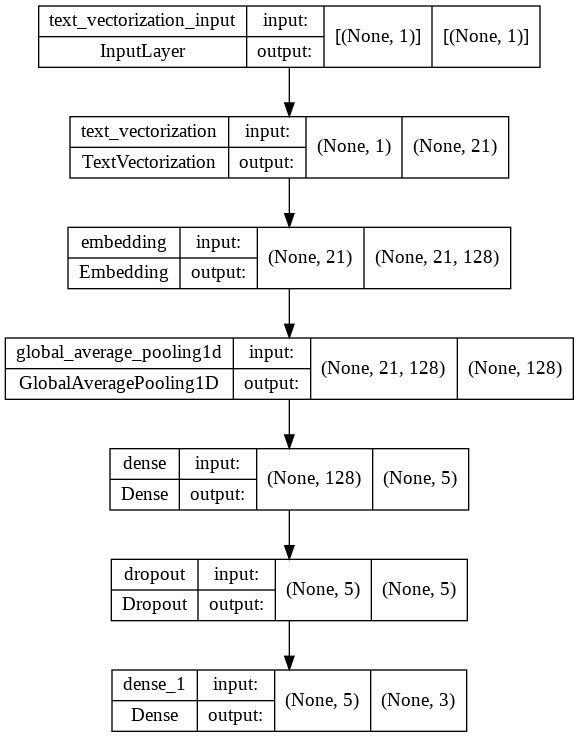

In [46]:
tf.keras.utils.plot_model(modeldnn, show_shapes=True)

Diatas adalah plot dari mmodel DNN yang dibuat

In [47]:
hist_dnn = modeldnn.fit(X_train,
                         y_train_ohe,epochs=10, callbacks=callbacks,
                         validation_data=(X_val, y_val_ohe))

Epoch 1/10
1216/1216 [==============================] - 7s 4ms/step - loss: 0.5291 - accuracy: 0.7808 - val_loss: 0.2616 - val_accuracy: 0.9165
Epoch 2/10
1216/1216 [==============================] - 5s 4ms/step - loss: 0.2858 - accuracy: 0.8915 - val_loss: 0.2119 - val_accuracy: 0.9338
Epoch 3/10
1216/1216 [==============================] - 5s 4ms/step - loss: 0.2336 - accuracy: 0.9041 - val_loss: 0.2033 - val_accuracy: 0.9406
Epoch 4/10
1216/1216 [==============================] - 5s 4ms/step - loss: 0.2016 - accuracy: 0.9158 - val_loss: 0.2049 - val_accuracy: 0.9412
Epoch 5/10
1216/1216 [==============================] - 5s 4ms/step - loss: 0.1827 - accuracy: 0.9282 - val_loss: 0.2088 - val_accuracy: 0.9426
Epoch 6/10
1216/1216 [==============================] - 5s 4ms/step - loss: 0.1711 - accuracy: 0.9330 - val_loss: 0.2340 - val_accuracy: 0.9424
Epoch 6: early stopping


Train model dengan 10 epochs, dan terstop pada 6 epoch karena memenuhi kriteria callbacks

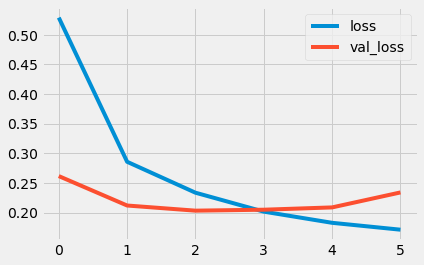

In [48]:
metrics_dnn = pd.DataFrame(hist_dnn.history)
metrics_dnn[['loss', 'val_loss']].plot();

Nilai loss dan val_loss mendapatkan loss yang kecil 0.20, dan bisa dikatakan goodfit karena memiliki gap yang kecil yaitu hanya 0.05 saja, dan akan dicoba untuk improvements modelnya untuk mendapatkan nilai yang lebih bagus

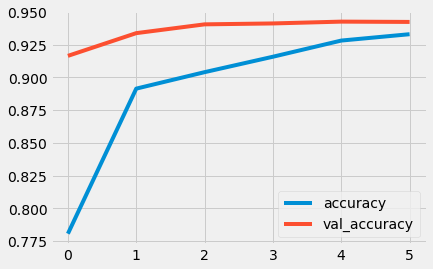

In [49]:
metrics_dnn[['accuracy', 'val_accuracy']].plot();

Nilai accuracy dan val_accuracy goodfit karena hanya memiliki gap yang kecil.

In [50]:
y_pred = modeldnn.predict(X_test)
y_pred = y_pred.argmax(axis=1)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.84      0.88       897
           1       0.94      0.95      0.94      3291
           2       0.94      0.96      0.95      3440

    accuracy                           0.94      7628
   macro avg       0.93      0.91      0.92      7628
weighted avg       0.94      0.94      0.94      7628



Nilai akurasi yang didapatkan bisa dikatakan bagus pada nilai 94%

## LSTM 

In [51]:
model_lstm = Sequential()
model_lstm.add(text_vectorization)
model_lstm.add(embedding)
model_lstm.add(LSTM(5))
model_lstm.add(Dropout(0.2))
model_lstm.add(Dense(3, activation='softmax'))

Model LSTM Sequential menggunakan :
- text_vectorization
- embedding
- 1 layer
- 5 neuron LSTM
- Dropout 20%

In [52]:
model_lstm.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

Compile model LSTM menggunakan :
- loss      : categorical_crossentropy
- optimizer : adam
- metrics   : accuracy

In [53]:
model_lstm.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization (TextVec  (None, 21)               0         
 torization)                                                     
                                                                 
 embedding (Embedding)       (None, 21, 128)           976896    
                                                                 
 lstm (LSTM)                 (None, 5)                 2680      
                                                                 
 dropout_1 (Dropout)         (None, 5)                 0         
                                                                 
 dense_2 (Dense)             (None, 3)                 18        
                                                                 
Total params: 979,594
Trainable params: 979,594
Non-trainable params: 0
________________________________________________

Summary model LSTM yang telah dibuat

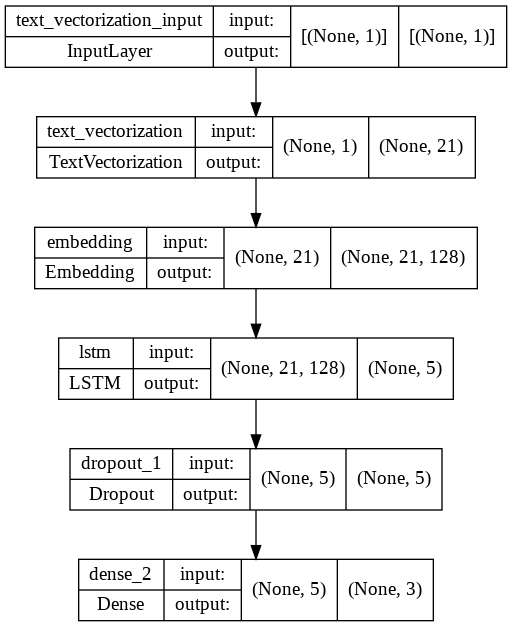

In [54]:
tf.keras.utils.plot_model(model_lstm, show_shapes=True)

Plot gambar flow model LSTM

In [55]:
hist_lstm = model_lstm.fit(X_train,
                         y_train_ohe,
                         epochs=10, callbacks=callbacks,
                         validation_data=(X_val, y_val_ohe))

Epoch 1/10
1216/1216 [==============================] - 10s 6ms/step - loss: 0.3530 - accuracy: 0.8836 - val_loss: 0.2454 - val_accuracy: 0.9419
Epoch 2/10
1216/1216 [==============================] - 7s 6ms/step - loss: 0.1547 - accuracy: 0.9629 - val_loss: 0.2295 - val_accuracy: 0.9477
Epoch 3/10
1216/1216 [==============================] - 7s 6ms/step - loss: 0.1182 - accuracy: 0.9700 - val_loss: 0.2259 - val_accuracy: 0.9473
Epoch 4/10
1216/1216 [==============================] - 8s 7ms/step - loss: 0.1030 - accuracy: 0.9733 - val_loss: 0.2268 - val_accuracy: 0.9477
Epoch 5/10
1216/1216 [==============================] - 7s 6ms/step - loss: 0.0905 - accuracy: 0.9778 - val_loss: 0.2357 - val_accuracy: 0.9482
Epoch 6/10
1216/1216 [==============================] - 7s 6ms/step - loss: 0.0793 - accuracy: 0.9807 - val_loss: 0.2432 - val_accuracy: 0.9473
Epoch 6: early stopping


Train model dengan 10 epochs, dan terstop pada 6 epoch karena memenuhi kriteria callbacks

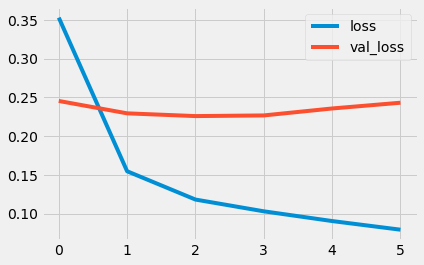

In [56]:
metrics_lstm = pd.DataFrame(hist_lstm.history)
metrics_lstm[['loss', 'val_loss']].plot();

terdapat hasil loss dan val_los yang sangat overfit pada baseline model LSTM dan nantinya akan dicoba untuk improvements model LSTM

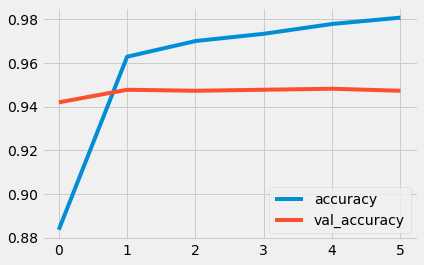

In [57]:
metrics_lstm[['accuracy', 'val_accuracy']].plot();

terdapat hasil accuracy dan val_accuracy yang sangat overfit pada baseline model LSTM dan nantinya akan dicoba untuk improvements model LSTM

In [58]:
y_pred = model_lstm.predict(X_test)
y_pred = y_pred.argmax(axis=1)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.84      0.89       897
           1       0.95      0.95      0.95      3291
           2       0.94      0.96      0.95      3440

    accuracy                           0.94      7628
   macro avg       0.94      0.92      0.93      7628
weighted avg       0.94      0.94      0.94      7628



Berdasarkan classification report model lstm mendapatkan 94% akurasi

# Model Improvements

## DNN

In [59]:
# Arsitektur model
model_dnn_imp2= Sequential()
model_dnn_imp2.add(text_vectorization)
model_dnn_imp2.add(embedding)
model_dnn_imp2.add(GlobalAveragePooling1D())
model_dnn_imp2.add(Dense(16, activation='relu'))
model_dnn_imp2.add(Dropout(0.2))
model_dnn_imp2.add(Dense(8, activation='relu'))
model_dnn_imp2.add(Dropout(0.2))
model_dnn_imp2.add(BatchNormalization())
model_dnn_imp2.add(Dense(4, activation='relu'))
model_dnn_imp2.add(Dropout(0.2))
model_dnn_imp2.add(Dense(3, activation='softmax'))

Pada model improvements DNN saya menambahkan 2 layar menjadi 3 layer, dan menambahkan BatchNormalization

In [60]:
model_dnn_imp2.compile(loss='categorical_crossentropy',
              optimizer='adamax',
              metrics=['accuracy'])

pada model compile saya awalnya tidak ada merubah apa-apa, tapi hasilnya sangat overfit sehingga saya merubah optimizer menjadi adamax

In [61]:
hist_dnn_imp1 = model_dnn_imp2.fit(X_train,
                         y_train_ohe,
                         epochs=50, callbacks=callbacks,
                         validation_data=(X_val, y_val_ohe))

Epoch 1/50
1216/1216 [==============================] - 8s 6ms/step - loss: 0.5228 - accuracy: 0.7901 - val_loss: 0.2391 - val_accuracy: 0.9382
Epoch 2/50
1216/1216 [==============================] - 6s 5ms/step - loss: 0.3641 - accuracy: 0.8517 - val_loss: 0.2290 - val_accuracy: 0.9399
Epoch 3/50
1216/1216 [==============================] - 6s 5ms/step - loss: 0.3385 - accuracy: 0.8540 - val_loss: 0.2231 - val_accuracy: 0.9447
Epoch 4/50
1216/1216 [==============================] - 7s 5ms/step - loss: 0.3121 - accuracy: 0.8617 - val_loss: 0.2215 - val_accuracy: 0.9452
Epoch 5/50
1216/1216 [==============================] - 7s 5ms/step - loss: 0.3041 - accuracy: 0.8674 - val_loss: 0.2268 - val_accuracy: 0.9438
Epoch 6/50
1216/1216 [==============================] - 6s 5ms/step - loss: 0.2965 - accuracy: 0.8705 - val_loss: 0.2263 - val_accuracy: 0.9436
Epoch 7/50
1216/1216 [==============================] - 6s 5ms/step - loss: 0.2935 - accuracy: 0.8710 - val_loss: 0.2267 - val_accuracy:

Train model dengan 10 epochs, dan terstop pada 7 epoch karena memenuhi kriteria callbacks

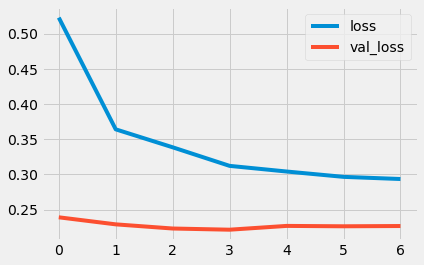

In [62]:
matrics_dnn_imp1 = pd.DataFrame(hist_dnn_imp1.history)
matrics_dnn_imp1[['loss', 'val_loss']].plot();

Ternyata hasil loss dan val_los model improvement DNN tidak terjadi peningkatan, malah memperburuk modelnya menjadi overfit dengan gap yang lebih besar dibandingkan base model DNN

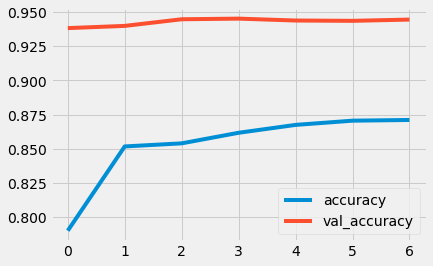

In [63]:
matrics_dnn_imp1[['accuracy', 'val_accuracy']].plot();

accuracy dan val_accuracy juga menjadi overfit terjadi peningkatan gap yang cukup jauh. maka bisa dikatakan model improvements dari DNN tidak tepat, sehinggga menggunakan base model DNN lebih baik dibandingkan model improvements

In [64]:
y_pred = model_dnn_imp2.predict(X_test)
y_pred = y_pred.argmax(axis=1)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.84      0.88       897
           1       0.94      0.95      0.94      3291
           2       0.94      0.95      0.95      3440

    accuracy                           0.94      7628
   macro avg       0.93      0.91      0.92      7628
weighted avg       0.94      0.94      0.94      7628



Untuk nilai classification report tidak ada perubahan tetap pada 94% akurasi

## LSTM

In [65]:
model_lstm1 = Sequential()
model_lstm1.add(text_vectorization)
model_lstm1.add(embedding)
model_lstm1.add(LSTM(1, return_sequences=True))
model_lstm1.add(Dropout(0.15))
model_lstm1.add(LSTM(1,return_sequences=True))
model_lstm1.add(Dropout(0.15))
model_lstm1.add(LSTM(1,return_sequences=True))
model_lstm1.add(Dropout(0.15))
model_lstm1.add(LSTM(1))
model_lstm1.add(Dropout(0.15))
model_lstm1.add(Dense(3, activation='softmax'))

Pada model improvements saya menambah 3 layer tambahan menjadi 4 layer, dan menurunkan neuron dari 5 ke 1, dan menambah dropout pada tiap layer

In [66]:
model_lstm1.compile(loss='categorical_crossentropy',
              optimizer='adamax',
              metrics=['accuracy'])

pada compile model merubah optimizer menjadi adamax

In [67]:
model_lstm1.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization (TextVec  (None, 21)               0         
 torization)                                                     
                                                                 
 embedding (Embedding)       (None, 21, 128)           976896    
                                                                 
 lstm_1 (LSTM)               (None, 21, 1)             520       
                                                                 
 dropout_5 (Dropout)         (None, 21, 1)             0         
                                                                 
 lstm_2 (LSTM)               (None, 21, 1)             12        
                                                                 
 dropout_6 (Dropout)         (None, 21, 1)             0         
                                                      

summary model improvements lstm

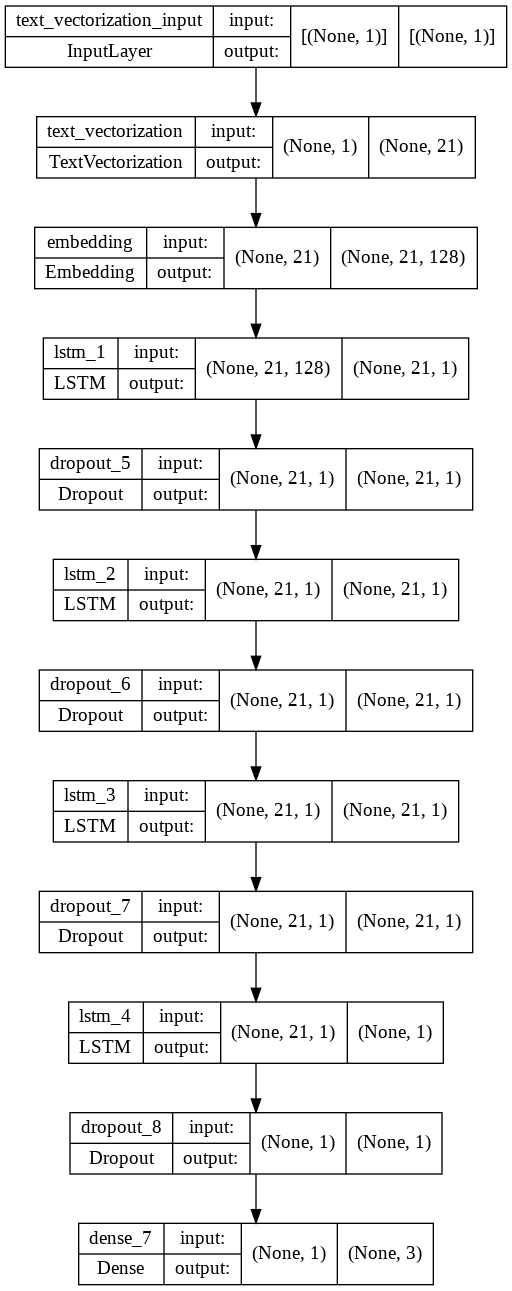

In [68]:
tf.keras.utils.plot_model(model_lstm1, show_shapes=True)

Plot dari model improvements LSTM

In [69]:
hist_5 = model_lstm1.fit(X_train,
                         y_train_ohe,
                         epochs=50, callbacks=callbacks,
                         validation_data=(X_val, y_val_ohe))

Epoch 1/50
1216/1216 [==============================] - 21s 13ms/step - loss: 0.8151 - accuracy: 0.6779 - val_loss: 0.5783 - val_accuracy: 0.8284
Epoch 2/50
1216/1216 [==============================] - 14s 11ms/step - loss: 0.5248 - accuracy: 0.7920 - val_loss: 0.4984 - val_accuracy: 0.8341
Epoch 3/50
1216/1216 [==============================] - 14s 11ms/step - loss: 0.4866 - accuracy: 0.7942 - val_loss: 0.4739 - val_accuracy: 0.8402
Epoch 4/50
1216/1216 [==============================] - 14s 11ms/step - loss: 0.4766 - accuracy: 0.7973 - val_loss: 0.4726 - val_accuracy: 0.8399
Epoch 5/50
1216/1216 [==============================] - 14s 11ms/step - loss: 0.4626 - accuracy: 0.8037 - val_loss: 0.4618 - val_accuracy: 0.8439
Epoch 6/50
1216/1216 [==============================] - 14s 12ms/step - loss: 0.4587 - accuracy: 0.8024 - val_loss: 0.4564 - val_accuracy: 0.8422
Epoch 7/50
1216/1216 [==============================] - 15s 12ms/step - loss: 0.4505 - accuracy: 0.8064 - val_loss: 0.4536 -

Train model menggunakan 50 epochs, dan terstop pada epoch ke 32 karena memenuhi kriteria callbacks

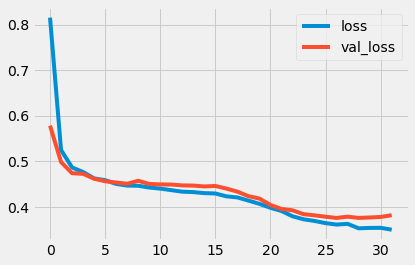

In [70]:
matrics_lstm_imp = pd.DataFrame(hist_5.history)
matrics_lstm_imp[['loss', 'val_loss']].plot();

terjadi perubahan hasil loss yang drastis, nilai loss dan val_loss pada model improvements LSTM menjadi goodfit dengan gap yang sangat kecil.

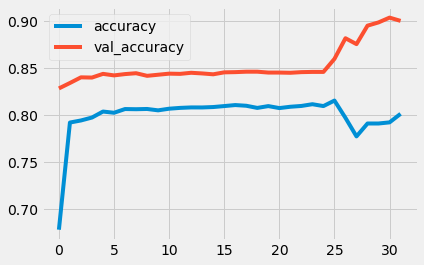

In [71]:
matrics_lstm_imp[['accuracy', 'val_accuracy']].plot();

Tetapi pada nilai accuracy dan val_accuracy tidak terjadi perubahan tetap pada overfitting, dan nilai akurasinya menurun. Maka untuk model terbaik terpilih adalah DNN base model.

In [72]:
y_pred = model_lstm1.predict(X_test)
y_pred = y_pred.argmax(axis=1)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.49      0.64       897
           1       0.90      0.95      0.92      3291
           2       0.89      0.96      0.93      3440

    accuracy                           0.90      7628
   macro avg       0.91      0.80      0.83      7628
weighted avg       0.90      0.90      0.89      7628



Terjadi penurunan nilai accuracy pada model imporvements LSTM 

Untuk model terbaik yang dipilih adalah base model DNN, karena memiliki nilia loss dan val_loss yang goodfit, nilai accuracy dan val_accuracy juga goodfit serta memiliki hasil akurasi yang terbaik juga yaitu 94%.

## Save Model

In [74]:
modeldnn.save('model_bitcoin')

INFO:tensorflow:Assets written to: model_bitcoin/assets


Menyimpan model terbaik yaitu RNN basemodel

# Data Inference

In [75]:
data_inf

,tweet,sentiment,text_length,clean_tweet,text_processed,label
0,RT @bethereumteam: Do you remember the last ti...,['positive'],140,: Do you remember the last time you had fun w...,rememb last tim fun bet wel 're bring holy trin,2
1,#ICE Agency Charges Payza and Two Canadian Cit...,['neutral'],139,#ICE Agency Charges Payza and Two Canadian Cit...,ag charg pays two canad cit money laund week u...,1
2,RT @bethereumteam: Today we're celebrating our...,['neutral'],140,: Today we're celebrating our #birthday! 🎂\nC...,today 're celebr click ic find 're,1
3,RT @Remi_Vladuceanu: Brave New World: Why the ...,['positive'],140,: Brave New World: Why the Crypto Revolution ...,brav new world crypto revolv shap modern individ,2
4,RT @AirdropKitty: Technical Analysis suggests ...,['neutral'],140,: Technical Analysis suggests that #Bitcoin c...,techn ana suggest could ris x lev,1
5,RT @dltk: Tokyo Bitcoin meetup (left) and Bitc...,['positive'],123,: Tokyo Bitcoin meetup (left) and Bitcoin Cas...,tokyo bitcoin meetup left bitcoin cash meetup ...,2
6,RT @BTCTN: Chinese Exchange Bitasia Now Suppor...,['neutral'],137,: Chinese Exchange Bitasia Now Supports 0-Con...,chin exchang bita suppo confirm bch transact,1
7,Bitcoin Is Ridiculous. Blockchain Is Dangerous...,['negative'],106,Bitcoin Is Ridiculous. Blockchain Is Dangerous...,bitcoin rid blockchain dang think,0
8,RT @CoinsAirdrops: #Bitcoin #Satoshi #Earn_Mon...,['positive'],140,: #Bitcoin #Satoshi #Earn_Money #cryptocurren...,new airdrop distribut mt,2
9,Current price of #Bitcoin is $8376.47,['neutral'],37,Current price of #Bitcoin is $8376.47,cur pric,1


Data inference yang di ambil random dari data train

In [76]:
load_model = keras.models.load_model("model_bitcoin")

Load model terbaik yaitu DNN baseline model.

In [77]:
y_pred_inf = load_model.predict(data_inf['text_processed'])
y_pred_inf

array([[3.00736810e-05, 1.53046294e-05, 9.99954581e-01],
       [2.18921659e-10, 9.99998569e-01, 1.44426247e-06],
       [6.36582298e-09, 9.99988317e-01, 1.16838291e-05],
       [5.40479632e-05, 2.19555528e-04, 9.99726355e-01],
       [6.68092959e-09, 9.99988794e-01, 1.11469535e-05],
       [2.30362639e-04, 3.89616668e-01, 6.10153019e-01],
       [5.68329028e-09, 9.99989867e-01, 1.01371133e-05],
       [6.43972028e-03, 9.45781827e-01, 4.77784984e-02],
       [3.91227404e-05, 9.17575359e-01, 8.23855177e-02],
       [5.48777166e-07, 9.99838591e-01, 1.60819982e-04]], dtype=float32)

didapatkan prediksi dari hasil tweet yang sudah di text processing

In [78]:
y_pred_inf = y_pred_inf.argmax(axis=1)
y_pred_inf

array([2, 1, 1, 2, 1, 2, 1, 1, 1, 1])

merubah hasil prediksi menjadi angka label

In [79]:
y_pred_inf = pd.DataFrame(y_pred_inf, columns=['sentiment-Prediction'])
y_pred_inf

,sentiment-Prediction
0,2
1,1
2,1
3,2
4,1
5,2
6,1
7,1
8,1
9,1


Merubah prediksi sentiment analysis menjadi dataframe

In [80]:
data_inf_concat = pd.concat([data_inf, y_pred_inf], axis=1)
data_inf_concat

,tweet,sentiment,text_length,clean_tweet,text_processed,label,sentiment-Prediction
0,RT @bethereumteam: Do you remember the last ti...,['positive'],140,: Do you remember the last time you had fun w...,rememb last tim fun bet wel 're bring holy trin,2,2
1,#ICE Agency Charges Payza and Two Canadian Cit...,['neutral'],139,#ICE Agency Charges Payza and Two Canadian Cit...,ag charg pays two canad cit money laund week u...,1,1
2,RT @bethereumteam: Today we're celebrating our...,['neutral'],140,: Today we're celebrating our #birthday! 🎂\nC...,today 're celebr click ic find 're,1,1
3,RT @Remi_Vladuceanu: Brave New World: Why the ...,['positive'],140,: Brave New World: Why the Crypto Revolution ...,brav new world crypto revolv shap modern individ,2,2
4,RT @AirdropKitty: Technical Analysis suggests ...,['neutral'],140,: Technical Analysis suggests that #Bitcoin c...,techn ana suggest could ris x lev,1,1
5,RT @dltk: Tokyo Bitcoin meetup (left) and Bitc...,['positive'],123,: Tokyo Bitcoin meetup (left) and Bitcoin Cas...,tokyo bitcoin meetup left bitcoin cash meetup ...,2,2
6,RT @BTCTN: Chinese Exchange Bitasia Now Suppor...,['neutral'],137,: Chinese Exchange Bitasia Now Supports 0-Con...,chin exchang bita suppo confirm bch transact,1,1
7,Bitcoin Is Ridiculous. Blockchain Is Dangerous...,['negative'],106,Bitcoin Is Ridiculous. Blockchain Is Dangerous...,bitcoin rid blockchain dang think,0,1
8,RT @CoinsAirdrops: #Bitcoin #Satoshi #Earn_Mon...,['positive'],140,: #Bitcoin #Satoshi #Earn_Money #cryptocurren...,new airdrop distribut mt,2,1
9,Current price of #Bitcoin is $8376.47,['neutral'],37,Current price of #Bitcoin is $8376.47,cur pric,1,1


Menggabungkan data inference dengan hasil prediksi

In [81]:
!zip -r /content/Model.zip /content/model_bitcoin

  adding: content/model_bitcoin/ (stored 0%)
  adding: content/model_bitcoin/variables/ (stored 0%)
  adding: content/model_bitcoin/variables/variables.data-00000-of-00001 (deflated 12%)
  adding: content/model_bitcoin/variables/variables.index (deflated 59%)
  adding: content/model_bitcoin/keras_metadata.pb (deflated 86%)
  adding: content/model_bitcoin/assets/ (stored 0%)
  adding: content/model_bitcoin/saved_model.pb (deflated 79%)


merubah folder model menjadi zip

In [82]:
from google.colab import files
files.download('/content/Model.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Download model dari google colab

# Kesimpulan

## EDA Analysis
1.  Banyak tweet yang berisi pada text yang berjumlah 150 karakter, ini bisa dikatakan karena untuk membahas bitcoin cukup banyak menggunakan karakter.
2. Sentiment positif banyak pada tweet yang mengandung give away seperti contoh `tweet berikut ini "Grab your F.ree bitcoins here :)`
3. Sedangkan sentiment negatif banyak pada tweet yang mengandung regulasi crypto diberbagai negara seperti contoh `Should we be crying out for standardisation and regulation of the digital currency Bitcoin?`
4. Kata yang sering muncul adalah Bitcoin, Blockchain, Satoshi dan cryptocurrency, hal ini bisa dijelaskan karena : 
    - Bitcoin adalah topik utama pada penelitian ini
    - Blockchain adalah sistem yang digunakan oleh bitcoin
    - Satoshi adalah founder dari bitcoin tersebut
    - Cryptocurrency adalah istilah dari mata uang digital, yang mana bitcoin adalah salah satu dari cryptocurrency

## Model Analysis
Saya menggunakan 2 model yaitu DNN dan LSTM yang mana kedua model tersebut akan dilakukan improvements untuk mendapatkan nilai akurasi yang lebih baik.
1. Base model DNN menggunakan Sequential, menggunakakan text vectorization, embedding, GlobalAveragePooling1D, dan menggunakan 1 layer saja menggunakan 5 neuron dan activation relu. Untuk model compilenya menggunakan Compile model DNN mengguanakan loss : categorical_crossentropy,  optimizer : adam dan metrics : accuracy. Train model menggunakan 10 epoch
    - Nilai loss dan val_loss mendapatkan loss yang kecil 0.20, dan bisa dikatakan goodfit karena memiliki gap yang kecil yaitu hanya 0.05 saja, dan akan dicoba untuk improvements modelnya untuk mendapatkan nilai yang lebih bagus
    - Nilai accuracy dan val_accuracy goodfit karena hanya memiliki gap yang kecil.
    - Nilai akurasi yang didapatkan bisa dikatakan bagus pada nilai 94%
2. Model LSTM Sequential menggunakan, text_vectorization, embedding, 1 layer, 5 neuron LSTM dan Dropout 20%. Compile model LSTM menggunakan loss : categorical_crossentropy, optimizer : adam, metrics : accuracy. Train model menggunakan 10 epochs.
    - Terdapat hasil loss dan val_los yang sangat overfit pada baseline model LSTM dan nantinya akan dicoba untuk improvements model LSTM
    - Terdapat hasil accuracy dan val_accuracy yang sangat overfit pada baseline model LSTM dan nantinya akan dicoba untuk improvements model LSTM
    - Berdasarkan classification report model lstm mendapatkan 94% akurasi

3. Pada model improvements DNN saya menambahkan 2 layar menjadi 3 layer, dan menambahkan BatchNormalization, pada model compile saya awalnya tidak ada merubah apa-apa, tapi hasilnya sangat overfit sehingga saya merubah optimizer menjadi adamax. Train model dengan 10 epochs, dan terstop pada 7 epoch karena memenuhi kriteria callbacks
    - Ternyata hasil loss dan val_los model improvement DNN tidak terjadi peningkatan, malah memperburuk modelnya menjadi overfit dengan gap yang lebih besar dibandingkan base model DNN
    - Accuracy dan val_accuracy juga menjadi overfit terjadi peningkatan gap yang cukup jauh. maka bisa dikatakan model improvements dari DNN tidak tepat, sehinggga menggunakan base model DNN lebih baik dibandingkan model improvements. 
    - Sehingga bisa dikatakan bahwa model improvements dari model DNN tidak tepat
4. Pada model improvements LSTM saya menambah 3 layer tambahan menjadi 4 layer, dan menurunkan neuron dari 5 ke 1, dan menambah dropout pada tiap layer. Pada compile model merubah optimizer menjadi adamax. Train model menggunakan 50 epochs, dan terstop pada epoch ke 32 karena memenuhi kriteria callbacks
    - Terjadi perubahan hasil loss yang drastis, nilai loss dan val_loss pada model improvements LSTM menjadi goodfit dengan gap yang sangat kecil.
    - Tetapi pada nilai accuracy dan val_accuracy tidak terjadi perubahan tetap pada overfitting, dan nilai akurasinya menurun. Maka untuk model terbaik terpilih adalah DNN base model.

5. Untuk model terbaik yang dipilih adalah base model DNN, karena memiliki nilia loss dan val_loss yang goodfit, nilai accuracy dan val_accuracy juga goodfit serta memiliki hasil akurasi yang terbaik juga yaitu 94%.

## Bisnis Analisis dan Future Imrpovements
1. Jumlah data yang sentiment positif paling banyak dibandingkan data yang lain, dan yang terendah adalah negatif maka bisa dikatakan bahwa mayoritas trader dan investor bitcoin di twitter menganggap bahwa bitcoin adalah alat investasi yang baik.
2. Memperbanyak percobaan kombinasi paramater yang tepat terhadap model DNN dan LSTM, karena keterbatasan waktu saya hanya menggunakan sedikit percobaan paramater.
3. Memperbanyak percobaan epoch yang lebih banyak, dan menggunakan callback lainya sehingga didapatkan nilai loss yang lebih baik.